In [85]:
import pandas as pd
train = pd.read_csv('train.csv')
top = train['Age'].value_counts().idxmax()
train['Age'] = train['Age'].fillna(top)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
q1 = train['Age'].quantile(.25)
q3 = train['Age'].quantile(.75)
IQR = q3 - q1
q0 = q1 - 1.5*IQR
q5 = q3 + 1.5*IQR
print(q0, q5)

2.5 54.5


{'whiskers': [<matplotlib.lines.Line2D at 0x2252202f090>,
 'caps': [<matplotlib.lines.Line2D at 0x2252202de90>,
 'boxes': [<matplotlib.lines.Line2D at 0x225220614d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2252202d9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22521a74150>],
 'means': []}

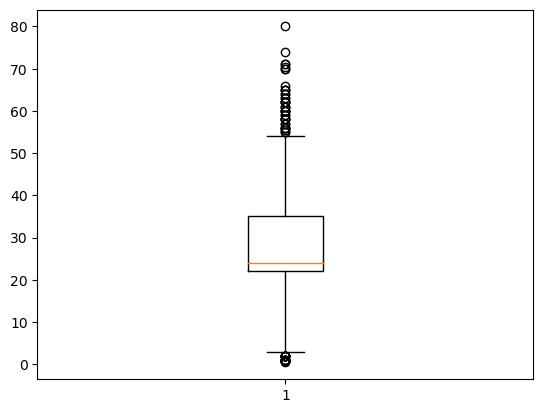

In [87]:
from matplotlib import pyplot as plt
plt.boxplot(train['Age'])

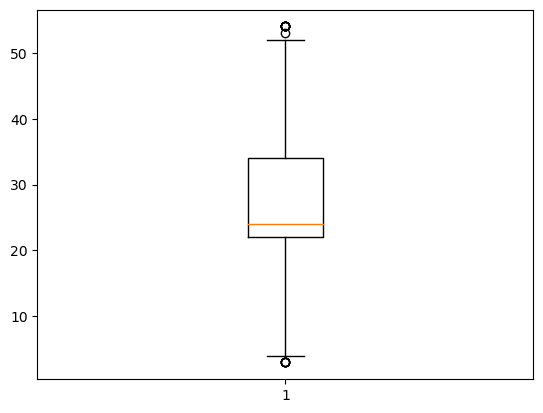

In [94]:
train_IQR = train.loc[(train['Age']>=q0) & (train['Age']<=q5)]

plt.boxplot(train_IQR['Age'])
plt.show()